In [51]:
#Import
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import json
import time
import seaborn as sns

#File paths 

file_1 = "Data/BTC_data1.csv"
file_2 = "Data/EOS-USD.csv"
file_3 = "Data/ETH_data1.csv"
file_4 = "Data/LTC_data1.csv"
file_5 = "Data/TRX-USD.csv"
file_6 = "Data/XLM-USD.csv"
file_7 = "Data/XRP-USD.csv"
file_8 = "Data/BCH-USD.csv"
file_9 = "Data/BNB-USD.csv"

#Reading stuff in

BTC = pd.DataFrame(pd.read_csv(file_1))
EOS = pd.DataFrame(pd.read_csv(file_2))
ETH = pd.DataFrame(pd.read_csv(file_3))
LTC = pd.DataFrame(pd.read_csv(file_4))
TRX = pd.DataFrame(pd.read_csv(file_5))
XLM = pd.DataFrame(pd.read_csv(file_6))
XRP = pd.DataFrame(pd.read_csv(file_7))
BCHABC = pd.DataFrame(pd.read_csv(file_8))
BNB = pd.DataFrame(pd.read_csv(file_9))


#Deleting first row in the beginning 

del BTC["Unnamed: 0"]
#del EOS["Unnamed: 0"]
del ETH["Unnamed: 0"]
del LTC["Unnamed: 0"]
#del TRX["Unnamed: 0"]
#del XLM["Unnamed: 0"]
#del XRP["Unnamed: 0"]
#del BCHABC["Unnamed: 0"]
# del BNB["Unnamed: 0"]

XRP_df = XRP.rename(columns = {"Date": "time_period_end", "Close": "XRP_close"})
EOS_df = EOS.rename(columns = {"Date": "time_period_end", "Close": "EOS_close"})
XLM_df = XLM.rename(columns = {"Date": "time_period_end", "Close": "XLM_close"})
TRX_df = TRX.rename(columns = {"Date": "time_period_end", "Close": "TRX_close"})
BCH_df = BCHABC.rename(columns = {"Date": "time_period_end", "Close": "BCH_close"})
BNB_df = BNB.rename(columns = {"Date": "time_period_end", "Close": "BNB_close"})
BTC = BTC.rename(columns = {"price_close": "BTC_close"})
ETH = ETH.rename(columns = {"price_close": "ETH_close"})
LTC = LTC.rename(columns = {"price_close": "LTC_close"})

BTC.head()



,Currency,time_period_end,price_open,price_high,price_low,BTC_close,volume_traded,trades_count
0,BTC,2014-01-06,732.000,1029.98765,728.0,904.000,265468.941620,399643.0
1,BTC,2014-01-13,903.297,1093.68199,720.0,835.490,528519.661236,800027.0
2,BTC,2014-01-20,835.490,973.20000,765.0,835.900,250720.703492,383336.0
3,BTC,2014-01-27,836.000,1038.15894,731.0,817.802,216735.464677,283022.0
4,BTC,2014-02-03,817.802,1022.00000,725.0,814.000,247780.206308,287406.0


In [52]:
#Merging DF together to make a superset 

crypto_ls = [BTC, ETH, XRP_df, LTC, BCH_df, BNB_df, EOS_df, XLM_df, TRX_df]

i = 0

crypto_df = BTC
for x in crypto_ls[1:]:
    
    crypto_df = crypto_df.merge(x, on="time_period_end", how='inner')
    
    
crypto_df.tail()

#crypto_df.to_csv("merged_data_cleaned.csv")

crypto_df


,Currency_x,time_period_end,price_open_x,price_high_x,price_low_x,BTC_close,volume_traded_x,trades_count_x,Currency_y,price_open_y,...,Low_x,XLM_close,Adj Close_x,Volume_x,Open_y,High_y,Low_y,TRX_close,Adj Close_y,Volume_y
0,BTC,2017-09-04,4343.500000,5.230000e+03,4.164790e+03,4606.260000,1.062412e+06,1333484.0,ETH,348.200000,...,0.01580,0.01669,0.01669,5065468,0.063780,6.378000e-02,0.000001,0.002094,0.002094,187058
1,BTC,2017-09-11,4626.050000,5.259000e+03,3.672710e+03,4233.900000,1.390836e+06,1518322.0,ETH,353.060000,...,0.00611,0.01123,0.01123,5283744,0.002086,2.310000e+00,0.000138,0.003346,0.003346,414140
2,BTC,2017-09-18,4251.360000,4.628000e+03,2.810460e+03,3719.000000,1.639051e+06,1790075.0,ETH,300.340000,...,0.01019,0.01157,0.01157,3866225,0.003853,1.179893e+08,0.000260,0.002247,0.002247,542829
3,BTC,2017-09-25,3719.980000,4.494990e+03,3.300000e+03,3672.700000,7.556791e+05,1076316.0,ETH,257.000000,...,0.01130,0.01387,0.01387,2779679,0.002344,3.099700e+07,0.000737,0.001884,0.001884,281497
4,BTC,2017-10-02,3669.010000,4.499990e+03,3.336670e+03,4388.740000,4.722008e+05,934442.0,ETH,283.210000,...,0.01126,0.01862,0.01862,10969235,0.001840,5.217704e+06,0.001707,0.002689,0.002689,1666841
5,BTC,2017-10-09,4394.810000,4.715000e+03,3.771000e+03,4597.980000,3.648962e+05,782734.0,ETH,301.240000,...,0.01580,0.01880,0.01880,7534080,0.002580,3.390000e-03,0.001419,0.002250,0.002250,90993
6,BTC,2017-10-16,4602.510000,6.004500e+03,3.500000e+03,5680.000000,7.010167e+05,1347741.0,ETH,309.830000,...,0.01855,0.03138,0.03138,41956052,0.002970,3.920000e-03,0.001770,0.002650,0.002650,99690
7,BTC,2017-10-23,5683.920000,6.500000e+03,4.850100e+03,5969.000000,6.098568e+05,1244766.0,ETH,336.890000,...,0.02950,0.03021,0.03021,12017753,0.002650,4.690000e-03,0.002150,0.002690,0.002690,17473
8,BTC,2017-10-30,5982.400000,6.500500e+03,4.780000e+03,6132.760000,6.171675e+05,1252992.0,ETH,295.140000,...,0.02345,0.02664,0.02664,7166787,0.002690,3.700000e-03,0.002020,0.002480,0.002480,10783
9,BTC,2017-11-06,6150.000000,7.899990e+03,4.780000e+03,7366.700000,7.554551e+05,1708218.0,ETH,303.210000,...,0.02630,0.02854,0.02854,15125472,0.002480,3.100000e-03,0.001570,0.001850,0.001850,11500


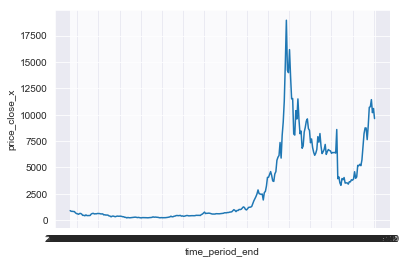

In [19]:
sns.set_style("darkgrid")
sns.lineplot(x='time_period_end', y='price_close_x', data=crypto_df)
plt.show()

In [53]:
final_df = crypto_df.copy()

# final_df.to_csv("temp.csv")

In [55]:
final_df

data_to_graph = final_df[["time_period_end",'BTC_close','ETH_close','XRP_close','LTC_close','BCH_close','BNB_close',\
                          'EOS_close','XLM_close','TRX_close']]

data_to_graph.head()

,time_period_end,BTC_close,ETH_close,XRP_close,LTC_close,BCH_close,BNB_close,EOS_close,XLM_close,TRX_close
0,2017-09-04,4606.26,350.63,0.2173,79.440,556.900024,0.9468,0.7450,0.01669,0.002094
1,2017-09-11,4233.90,297.90,0.1814,67.205,439.070007,0.7914,0.6233,0.01123,0.003346
2,2017-09-18,3719.00,259.10,0.1757,50.718,421.190002,0.7848,0.5454,0.01157,0.002247
3,2017-09-25,3672.70,282.00,0.2083,47.300,418.049988,1.5230,0.7085,0.01387,0.001884
4,2017-10-02,4388.74,303.25,0.2799,54.690,343.519989,1.2000,0.6060,0.01862,0.002689


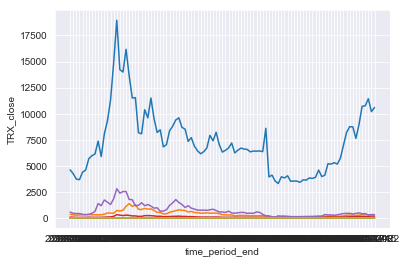

In [62]:
# sns.lineplot(x='time_period_end', y='price_close_x', data=crypto_df)

ls = ['BTC_close','ETH_close','XRP_close','LTC_close','BCH_close','BNB_close','EOS_close','XLM_close','TRX_close']
x_axis = crypto_df["time_period_end"].unique()

for x in ls:
    sns.lineplot(x='time_period_end', y=x, data=data_to_graph)
    #sns.regplot(x=data_to_graph['time_period_end'], y = data_to_graph[x], line_kws={"color":"r","alpha":0.7,"lw":5}, data=data_to_graph)
